In [19]:
import pandas as pd

df=pd.read_csv("data/tweet_emotions.csv")
df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [20]:
df=df[["sentiment","content"]]
df=df.rename(columns={"sentiment":"label","content":"text"})

df.head()

,label,text
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


In [21]:
df.shape

(40000, 2)

In [22]:
import os

dir=os.listdir("data/")
dir

['emotion_detection_dataset.csv',
 'test.txt',
 'train.txt',
 'tweet_emotions.csv',
 'val.txt']

In [23]:
rows = []
for file in dir:
    if not file.endswith(".csv"):
        with open(f"data/{file}", "r") as f:
            lines = f.readlines()
            for line in lines:
                if ";" not in line:
                    continue
                text, label = line.split(";", 1)
                rows.append({"label": label.strip(), "text": text.strip()})

dataframe = pd.DataFrame(rows)
dataframe.head()

,label,text
0,sadness,im feeling rather rotten so im not very ambiti...
1,sadness,im updating my blog because i feel shitty
2,sadness,i never make her separate from me because i do...
3,joy,i left with my bouquet of red and yellow tulip...
4,sadness,i was feeling a little vain when i did this one


In [24]:
dataframe.shape

(20000, 2)

In [25]:
full_dataframe = pd.concat([df, dataframe], ignore_index=True)
full_dataframe.head()

,label,text
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


In [26]:
full_dataframe.to_csv("data/emotion_detection_dataset.csv", index=False)

In [3]:
import pandas as pd

full_dataframe=pd.read_csv("data/emotion_detection_dataset.csv")

In [4]:
full_dataframe.shape

(60000, 2)

In [5]:
full_dataframe.head(20)

,label,text
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...
5,worry,Re-pinging @ghostridah14: why didn't you go to...
6,sadness,"I should be sleep, but im not! thinking about ..."
7,worry,Hmmm. http://www.djhero.com/ is down
8,sadness,@charviray Charlene my love. I miss you
9,sadness,@kelcouch I'm sorry at least it's Friday?


In [6]:
full_dataframe.label.value_counts()

label
sadness       10962
neutral        8638
worry          8459
joy            6761
love           5483
happiness      5209
surprise       2906
anger          2819
fear           2373
fun            1776
relief         1526
hate           1323
empty           827
enthusiasm      759
boredom         179
Name: count, dtype: int64

### Removing low count vaalues and neutral value ( from dataset i found they are confusing for other categories)

In [ ]:
full_dataframe=full_dataframe[full_dataframe["label"].isin(["sadness","worry","joy","love","happiness","surprise"])]
full_dataframe.head()

,label,text
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
4,neutral,@dannycastillo We want to trade with someone w...
5,worry,Re-pinging @ghostridah14: why didn't you go to...
6,sadness,"I should be sleep, but im not! thinking about ..."


In [8]:
full_dataframe["label"]=full_dataframe["label"].replace("happiness","joy")

In [9]:
full_dataframe.label.value_counts()

label
joy         11970
sadness     10962
neutral      8638
worry        8459
love         5483
surprise     2906
Name: count, dtype: int64

In [10]:
full_dataframe.shape

(48418, 2)

<Axes: xlabel='label', ylabel='count'>

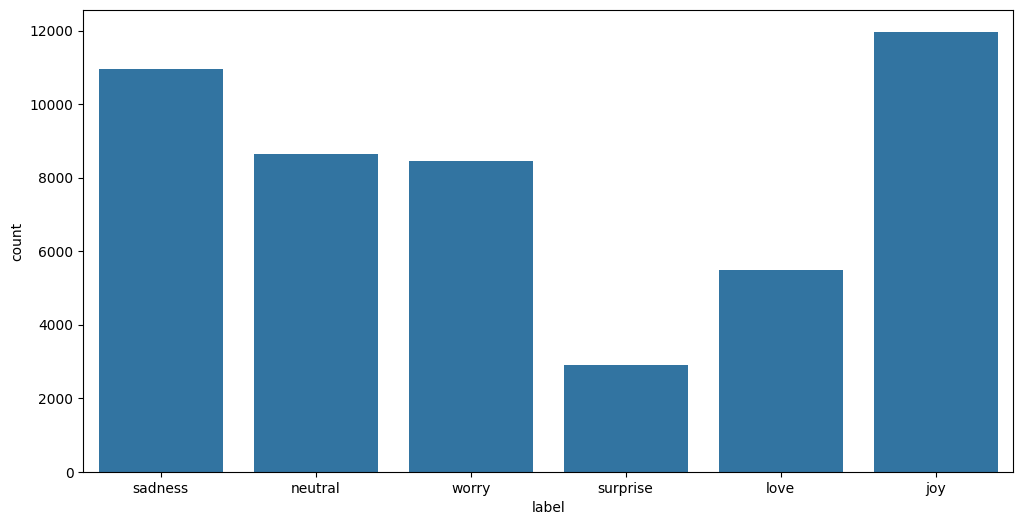

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.countplot(x='label', data=full_dataframe)

In [12]:
import re
import html
# modified with GPT for best practices
def clean_text(text):
    text = html.unescape(text)
    text = text.lower()
    text = re.sub(r'<.*?>', ' ', text)             # remove HTML
    text = re.sub(r'http\S+|www\.\S+', ' ', text)  # remove URLs
    text = re.sub(r'\S+@\S+', ' ', text)           # remove emails
    text = re.sub(r"(.)\1{2,}", r"\1\1", text)     # soooo -> soo
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [13]:
full_dataframe["text"] = full_dataframe["text"].apply(clean_text)

In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
full_dataframe["label_enc"] = label_encoder.fit_transform(full_dataframe["label"])

full_dataframe.head()

,label,text,label_enc
1,sadness,layin n bed with a headache ughh..waitin on yo...,3
2,sadness,funeral ceremony..gloomy friday..,3
4,neutral,@dannycastillo we want to trade with someone w...,2
5,worry,re-pinging @ghostridah14: why didn't you go to...,5
6,sadness,"i should be sleep, but im not! thinking about ...",3


In [15]:
from sklearn.model_selection import train_test_split
train_df, val_test = train_test_split(full_dataframe, test_size=0.2, stratify=full_dataframe["label_enc"], random_state=42)
val_df, test_df = train_test_split(val_test, test_size=0.5, stratify=val_test["label_enc"], random_state=42)
print(f"Train shape: {train_df.shape}, Val shape: {val_df.shape}, Test shape: {test_df.shape}")

Train shape: (38734, 3), Val shape: (4842, 3), Test shape: (4842, 3)


In [21]:
# Better Tokenizer for Emotion Detection
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

class EmotionTokenizer:
    def __init__(self, vocab_size=5000, min_freq=2):
        self.vocab_size = vocab_size
        self.min_freq = min_freq
        self.word2idx = {"<PAD>": 0, "<UNK>": 1}
        self.idx2word = {0: "<PAD>", 1: "<UNK>"}
        self.pad_token_id = 0
        self.unk_token_id = 1
    
    def build_vocab(self, texts):
        """Build vocabulary from texts, keeping emotional words"""
        word_freq = Counter()
        
        for text in texts:
            # Keep punctuation for emotion (!, ?, ...) and tokenize
            tokens = text.split()
            for token in tokens:
                word_freq[token] += 1
        
        # Keep only frequent words + emotional expressions
        idx = 2
        for word, freq in word_freq.most_common(self.vocab_size - 2):
            if freq >= self.min_freq:
                self.word2idx[word] = idx
                self.idx2word[idx] = word
                idx += 1
    
    def encode(self, text):
        """Convert text to token IDs"""
        tokens = text.split()
        return [self.word2idx.get(token, self.unk_token_id) for token in tokens]
    
    def __call__(self, texts, padding=True, truncation=True, max_length=128, return_tensors="pt"):
        """Tokenize with emotion-friendly settings"""
        if isinstance(texts, str):
            texts = [texts]
        
        input_ids = []
        for text in texts:
            ids = self.encode(text)
            if truncation and len(ids) > max_length:
                ids = ids[:max_length]
            input_ids.append(ids)
        
        if padding:
            max_len = min(max(len(ids) for ids in input_ids), max_length)
            input_ids = [ids + [self.pad_token_id] * (max_len - len(ids)) for ids in input_ids]
        
        if return_tensors == "pt":
            import torch
            input_ids = torch.tensor(input_ids, dtype=torch.long)
        
        return {"input_ids": input_ids}

# Build tokenizer
tokenizer = EmotionTokenizer(vocab_size=5000, min_freq=2)
tokenizer.build_vocab(full_dataframe["text"].tolist())
print(f"Vocabulary size: {len(tokenizer.word2idx)}")


Vocabulary size: 5000


In [22]:
vocab_size = tokenizer.vocab_size
vocab_size

5000

In [18]:
import torch
from torch.utils.data import Dataset, DataLoader

class EmotionDataset(Dataset):
    def __init__(self,df):
        self.texts=df["text"].tolist()
        self.labels=df["label_enc"].tolist()
        
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        return {
            "text":self.texts[idx],  
            "label":self.labels[idx]
        }
        

def collate_fn(batch):
    texts = [str(item["text"]) if item["text"] is not None else "" for item in batch]
    labels = [item["label"] for item in batch]
    
    encoded = tokenizer(
        texts,
        padding=True,
        truncation=True,
        max_length=128,
        return_tensors="pt"
    )
    
    return {
        "input_ids": encoded["input_ids"],
        "labels": torch.tensor(labels, dtype=torch.long)
    }


In [19]:
train_dataloader = DataLoader(EmotionDataset(train_df), batch_size=8, shuffle=True, collate_fn=collate_fn)
val_dataloader = DataLoader(EmotionDataset(val_df), batch_size=8, shuffle=True, collate_fn=collate_fn)
test_dataloader = DataLoader(EmotionDataset(test_df), batch_size=8, shuffle=False, collate_fn=collate_fn)

In [20]:
next(iter(train_dataloader))

{'input_ids': tensor([[   1,  138,   14,    4, 4072, 1281,    1,  185,   12,   44,    0,    0,
             0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
             0,    0,    0,    0],
         [   2,   60,   48,  532,   62,   83,   60,   67,   18, 1035,    3,   19,
             5,    2,   24, 1385,  722,   10,   83,   60,   27,   67, 1623,   23,
            19,   34,  133,  246],
         [   2,   72,    3,   81,    1,    1, 1532,    6, 3234,   21,   50,    2,
           169,    6,    1,    1,  127,  274,  244,   17,    1,   73,  101,  786,
             1,    0,    0,    0],
         [   2,    7,    4, 1708,  540, 1308, 4737,   14,    1,   28, 1705,  340,
             1,    8,    1,  478,    0,    0,    0,    0,    0,    0,    0,    0,
             0,    0,    0,    0],
         [   1,   77,   29,    1,  406,   55,    3,  247,  330,    0,    0,    0,
             0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
             0,    0,    0,

In [ ]:
import torch.nn as nn
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence

EMBED_DIM = 128
HIDDEN_DIM = 256
NUM_LAYERS = 2
RNN_TYPE = "lstm"
MAX_LENGTH = 128

class EmotionRNN(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim, num_layers=1, rnn_type=RNN_TYPE):
        super(EmotionRNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim=embed_dim, padding_idx=tokenizer.pad_token_id)
        
        if rnn_type == "lstm":
            self.rnn = nn.LSTM(input_size=embed_dim, hidden_size=hidden_dim, num_layers=num_layers, 
                              batch_first=True, dropout=0.3 if num_layers > 1 else 0)
        elif rnn_type == "gru":
            self.rnn = nn.GRU(input_size=embed_dim, hidden_size=hidden_dim, num_layers=num_layers, 
                             batch_first=True, dropout=0.3 if num_layers > 1 else 0)
        
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(0.4)
        
    def forward(self, input_ids):
        # Compute lengths from non-pad tokens
        lengths = (input_ids != tokenizer.pad_token_id).sum(dim=1)
        lengths = torch.clamp(lengths, min=1)  # Ensure at least 1 to avoid errors
        
        embedded = self.embedding(input_ids)
        
        # Pack padded sequence for efficient computation
        packed_embedded = pack_padded_sequence(
            embedded, lengths.cpu(), batch_first=True, enforce_sorted=False
        )
        packed_output, _ = self.rnn(packed_embedded)
        
        # Unpack the packed sequence
        rnn_out, _ = pad_packed_sequence(packed_output, batch_first=True)
        
        # Get the last hidden state for each sequence
        batch_size = input_ids.size(0)
        last_hidden = rnn_out[range(batch_size), lengths.cpu() - 1]
        
        out = self.dropout(last_hidden)
        out = self.fc(out)
        return out


In [60]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = EmotionRNN(
    vocab_size=vocab_size,
    embed_dim=EMBED_DIM,
    hidden_dim=HIDDEN_DIM,
    output_dim=len(label_encoder.classes_),
    num_layers=NUM_LAYERS,
    rnn_type=RNN_TYPE
).to(device)

In [61]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-5)
EPOCHS = 10

In [ ]:
from tqdm import tqdm

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    
    for batch in tqdm(train_dataloader, desc=f"Training Epoch {epoch+1}/{EPOCHS}"):
        input_ids = batch["input_ids"].to(device)
        labels = batch["labels"].to(device)
        
        optimizer.zero_grad()
        outputs = model(input_ids)
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        
    avg_loss = total_loss / len(train_dataloader)
    print(f"Epoch {epoch+1}/{EPOCHS}, Training Loss: {avg_loss:.4f}")
    
    model.eval()
    correct = 0
    total = 0
    
    with torch.no_grad():
        for batch in tqdm(val_dataloader, desc=f"Validation Epoch {epoch+1}/{EPOCHS}"):
            input_ids = batch["input_ids"].to(device)
            labels = batch["labels"].to(device)
            
            outputs = model(input_ids)
            _, predicted = torch.max(outputs.data, 1)
            
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = correct / total
    print(f"Epoch {epoch+1}/{EPOCHS}, Validation Accuracy: {accuracy:.4f}") 

In [ ]:
torch.save(model.state_dict(), "emotion_rnn_model.pth")

In [ ]:
def predict(text, model):
    model.eval()
    cleaned_text = clean_text(text)
    encoded = tokenizer(
        cleaned_text,
        padding=True,
        truncation=True,
        max_length=128,
        return_tensors="pt"
    )
    
    input_ids = encoded["input_ids"].to(device)
    
    with torch.no_grad():
        outputs = model(input_ids)
        _, predicted = torch.max(outputs.data, 1)
    label = label_encoder.inverse_transform(predicted.cpu().numpy())
    return label[0]

sample_text = "I am so happy today!"
predicted_label = predict(sample_text, model)
print(f"Text: {sample_text}\nPredicted Emotion: {predicted_label}")
